# Premiers pas
Mon premier exercice avec les Notebooks Python... 

In [4]:
a = 47
nom = 'Toto'

print('Hello ! Je suis', nom,"et j'ai",a,'ans.')

Hello ! Je suis Toto et j'ai 47 ans.


In [5]:
a = len(nom) * 2
print ('double',a)

double 8


In [6]:
a = 2.5
print (a)
print (type(a))

a * 2 

2.5
<class 'float'>


5.0

In [7]:
a = 'Hello'
print (a)
print (type(a))

a * 2

Hello
<class 'str'>


'HelloHello'

## Structures de données
un dictionnaire est une collection de pairs clé-valeur


In [8]:
eleve = { 'nom':'Toto', 'matr': 100, 'formation': 'marketing'}
print (eleve)

{'nom': 'Toto', 'matr': 100, 'formation': 'marketing'}


In [9]:
eleve['nom']

'Toto'

Une liste est une collection ordonnée de valeurs. Chaque valeur occupe une position précise. 

In [10]:
notes = [ 12.5 , 9.5 , 14.5 ]
print (notes)

[12.5, 9.5, 14.5]


In [11]:
notes[0]

12.5

In [12]:
eleve['notes'] = notes
print(eleve)

{'nom': 'Toto', 'matr': 100, 'formation': 'marketing', 'notes': [12.5, 9.5, 14.5]}


In [13]:
notes[0:2]

[12.5, 9.5]

## Bibliothèques
pour utiliser une bibliothèque, il faut l'importer. 

In [14]:
import math as mt
mt.sqrt(notes[1])

3.082207001484488

## Pandas
### Créer son premier DataFrame

In [15]:
import pandas as pnd
monDF = pnd.DataFrame ( { 'Habitants' : [ 8, 70, 320, 1200 ], 
                         'Capital': ['Geneve', 'Paris', 'Washington', 'Pequin'] },
                         index=['Suisse', 'France', 'USA', 'Chine'])
print (monDF)

        Habitants     Capital
Suisse          8      Geneve
France         70       Paris
USA           320  Washington
Chine        1200      Pequin


In [16]:
monDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Suisse to Chine
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Habitants  4 non-null      int64 
 1   Capital    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


In [17]:
monDF.describe()

,Habitants
count,4.000000
mean,399.500000
std,550.443155
min,8.000000
25%,54.500000
50%,195.000000
75%,540.000000
max,1200.000000


### Trouver une information 

Trouver la capital (colonne) de la France (index).

In [18]:
monDF.loc [ 'France' ] [ 'Capital' ]


'Paris'

Trouver les pays dont le nombre d'habitants est supérieur à 100. 

In [35]:
monDF.loc [ monDF [ 'Habitants' ] > 100 ]

,Habitants,Capital
USA,320,Washington
Chine,1200,Pequin


Trouver les pays dont le nombre d'habitants se trouve entre 100 et 1000. 

In [36]:
monDF.loc [  ( monDF [ 'Habitants' ] > 100 ) & ( monDF [ 'Habitants' ] < 1000 ) ]


,Habitants,Capital
USA,320,Washington


### Pris en main dropna

In [19]:
df2 = pnd.DataFrame({'A':[0, pnd.NA, 1, -2], 
                         'B':['Titi', 'Toto', 'Tata', 'Tutu'],
                         'C':['2020-01-01', '2021-02-02', pnd.NaT, '2019-12-30']})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       3 non-null      object        
 1   B       4 non-null      object        
 2   C       3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 224.0+ bytes


In [20]:
df2.dropna(axis='columns')

,B
0,Titi
1,Toto
2,Tata
3,Tutu


In [21]:
df2.dropna(axis='index')

,A,B,C
0,0,Titi,2020-01-01
3,-2,Tutu,2019-12-30


In [22]:
print(df2)

      A     B          C
0     0  Titi 2020-01-01
1  <NA>  Toto 2021-02-02
2     1  Tata        NaT
3    -2  Tutu 2019-12-30


In [23]:
df2

,A,B,C
0,0,Titi,2020-01-01
1,<NA>,Toto,2021-02-02
2,1,Tata,NaT
3,-2,Tutu,2019-12-30


In [24]:
df2.dropna(inplace=True)

In [25]:
df2

,A,B,C
0,0,Titi,2020-01-01
3,-2,Tutu,2019-12-30


### Prise en main to_datetime

In [26]:
dfDates = pnd.DataFrame ({ 'Debut': ['2021-09-13', '2022-01-24'], 
                           'Fin' : ['17/12/2021', '23/04/2022'],
                           'Examens':['01042022', '05042022'], 
                           'Semestre' : ['S1', 'S2'] } )
dfDates

,Debut,Fin,Examens,Semestre
0,2021-09-13,17/12/2021,01042022,S1
1,2022-01-24,23/04/2022,05042022,S2


In [27]:
pnd.to_datetime(dfDates['Debut'], yearfirst=True)

0   2021-09-13
1   2022-01-24
Name: Debut, dtype: datetime64[ns]

In [28]:
pnd.to_datetime(dfDates['Fin'], dayfirst=True)

0   2021-12-17
1   2022-04-23
Name: Fin, dtype: datetime64[ns]

In [29]:
pnd.to_datetime(dfDates['Examens'], format='%m%d%Y')

0   2022-01-04
1   2022-05-04
Name: Examens, dtype: datetime64[ns]

## Prise en main graphiques (Matplotlib)

In [30]:
donnees = pnd.DataFrame({'note': [2, 5, 12, 18, 10], 
                         'rendus':[1, 3, 5, 7, 9 ],
                         'nom':['Titi','Toto','Tata','Tarbes','Titus']})
donnees

,note,rendus,nom
0,2,1,Titi
1,5,3,Toto
2,12,5,Tata
3,18,7,Tarbes
4,10,9,Titus


In [31]:
import matplotlib.pyplot as plt

# pour l'affichage dans un notebook
%matplotlib inline 

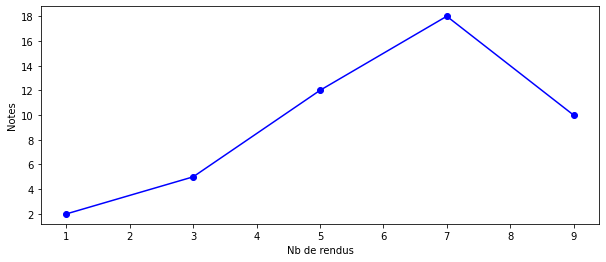

In [32]:
plt.figure(figsize=(10, 4))
plt.xlabel("Nb de rendus")
plt.ylabel("Notes")
plt.plot(donnees['rendus'], donnees['note'], color='blue', marker='o')

<BarContainer object of 5 artists>

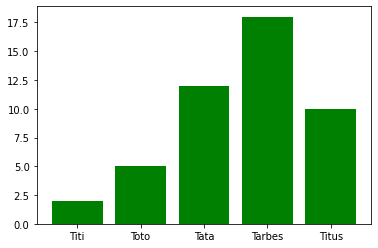

In [33]:
plt.bar(donnees['nom'], donnees['note'], color='green')

([<matplotlib.patches.Wedge at 0x7fa5516183d0>,
 [Text(1.0913261718331657, 0.13786655385541477, 'Titi'),
  Text(0.8899187028927925, 0.6465637650236903, 'Toto'),
  Text(-0.06906955709217581, 1.097829402176445, 'Tata'),
  Text(-1.1, 1.3471114790620887e-16, 'Tarbes'),
  Text(0.4683572691791438, -0.9953097349102215, 'Titus')])

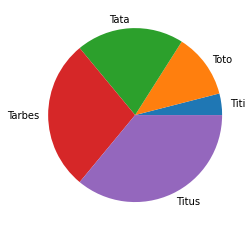

In [34]:
plt.pie(donnees['rendus'],labels=donnees['nom'])